In [94]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits


In [96]:

hdul = fits.open(
    'Data/jvds_stelkin_cat_v012_mge_seecorr_kh20_v20231208_private.fits'
)
print(hdul.info())


Filename: Data/jvds_stelkin_cat_v012_mge_seecorr_kh20_v20231208_private.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  DATA          1 BinTableHDU    195   3430R x 85C   [K, K, 69A, 21A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, D, D, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E]   
None


In [98]:
from astropy.table import Table

table = Table.read(
    'Data/jvds_stelkin_cat_v012_mge_seecorr_kh20_v20231208_private.fits',
    hdu='DATA'   # or hdu=1
)

df = table.to_pandas()


In [100]:
df.columns

Index(['CATID', 'CATID_EXT', 'SAMI_FILENAME', 'OBS_DATE', 'RA', 'DEC',
       'LMSTAR', 'Z_SPEC', 'Z_TONRY', 'GMINUSI', 'MU_AT_RE', 'GAL_FLAG',
       'HWHM_PSF', 'RE', 'RE_CIRC_KPC', 'ELLIP', 'N_SERSIC', 'MTYPE',
       'KIN_MTYPE', 'ENV_DIST_TO_5NN', 'ENV_SURFDENS', 'E_ENV_SURFDENS',
       'SAMI_ISO', 'SAMI_CENTRAL', 'SAMI_SAT', 'HALOMASS', 'HALOMASS_UNIQUE',
       'GROUP_ID', 'HALOMASS_WEIGHT', 'PA_PHOT', 'PA_STELKIN', 'E_PA_STELKIN',
       'PA_GASKIN', 'E_PA_GASKIN', 'RMAX_VSIGMA', 'RMAX_H34', 'SIGMA_RE',
       'E_SIGMA_RE', 'VRMS_RE', 'E_VRMS_RE', 'APER_CORR_FLAG',
       'RMAX_APER_CORR', 'LAMBDAR_RE', 'E_LAMBDAR_RE', 'LAMBDAR_MAX',
       'E_LAMBDAR_MAX', 'LAMBDAR_RE_EO', 'E_LAMBDAR_RE_EO', 'VSIGMA_RE',
       'E_VSIGMA_RE', 'VSIGMA_MAX', 'EVSIGMA_MAX', 'VSIGMA_RE_EO',
       'E_VSIGMA_RE_EO', 'MEAN_K51_RE', 'E_MEAN_K51_RE', 'FR_EE11', 'SR_EE11',
       'FR_MC16', 'SR_MC16', 'FR_JVDS20', 'SR_JVDS20', 'PFR_JVDS20',
       'PSR_JVDS20', 'INTRINSIC_ELLIP', 'INCLINATION', 'LR_SE

In [102]:
subset = df[['LMSTAR', 'LAMBDAR_RE']].dropna()
subset

,LMSTAR,LAMBDAR_RE
3,10.480000,0.650099
4,11.120000,0.070310
6,11.050000,0.342944
7,10.960000,0.731435
8,10.920000,0.503037
...,...,...
3423,9.867504,0.556708
3424,10.734562,0.612262
3425,10.519668,0.675707
3427,9.801854,0.559728


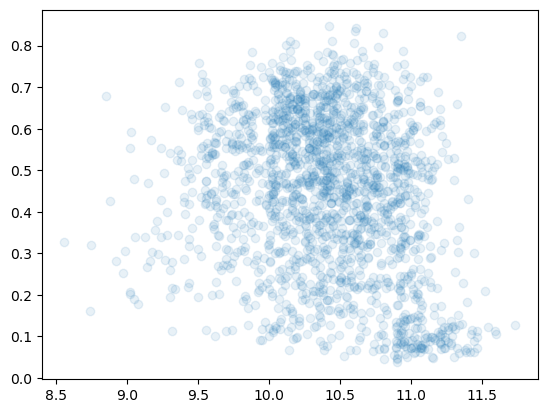

In [104]:
plt.scatter(subset['LMSTAR'], subset['LAMBDAR_RE'], alpha = 0.1)

In [106]:
jitter1 = np.random.normal(loc = 1, scale = 0.001, size = 1833)
jitter2 = np.random.normal(loc = 1, scale = 0.001, size = 1833)

subset['LMSTAR'] *= jitter1
subset['LAMBDAR_RE'] *= jitter2

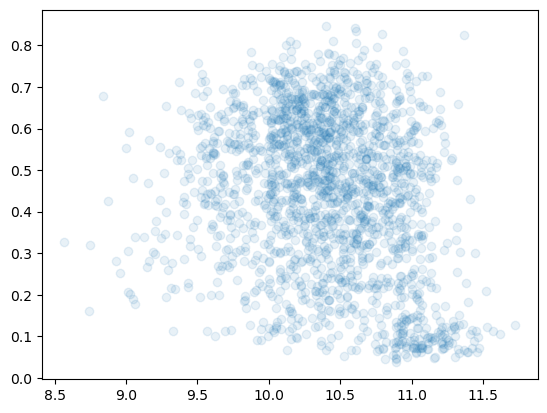

In [108]:
plt.scatter(subset['LMSTAR'], subset['LAMBDAR_RE'], alpha = 0.1)

In [110]:
subset.to_csv('vandeSande2021.csv', index = False)

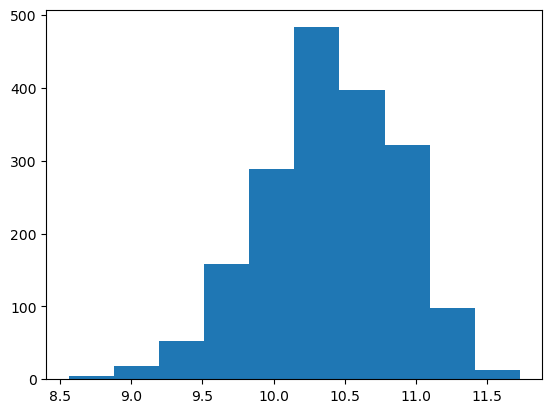

In [31]:
_ = plt.hist(subset['LMSTAR'])

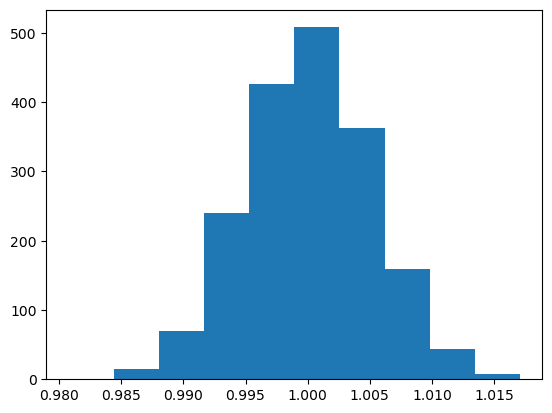

In [37]:
_ = plt.hist(np.random.normal(loc = 1, scale = 0.005, size = 1833))